In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%%html
#<style>
#.output_wrapper, .output {
#    height:auto !important;
#    max-height:1000px;  /* your desired max-height here */
#}
#.output_scroll {
#    box-shadow:none !important;
#    webkit-box-shadow:none !important;
#}
#</style>

In [3]:
import sys
sys.path.append("..")

In [4]:
from optimus import Optimus
from optimus.profiler.functions import print_json as j

In [5]:
# Create optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)


                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Just checking that all necessary environments vars are present...
-----
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
PYSPARK_PYTHON=python
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the checkpoint directory...
Optimus successfully imported. Have

In [6]:
df = op.read.csv("Meteorite_Landings.csv", header=True)

In [7]:
df.table()

name (string),id (string),nametype (string),recclass (string),mass (g) (string),fall (string),year (string),reclat (string),reclong (string),GeoLocation (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


In [9]:
import timeit
from optimus.helpers.functions import print_json as pj

In [10]:
from optimus.profiler.profiler import Profiler
profiler = Profiler()

Proccesing column 'name'...
Proccesing column 'id'...
Using 'column_exp' to process column 'id_buckets' with function _bucketizer
Proccesing column 'nametype'...
Proccesing column 'recclass'...
Proccesing column 'mass (g)'...
Using 'column_exp' to process column 'mass (g)_buckets' with function _bucketizer
Proccesing column 'fall'...
Proccesing column 'year'...
Proccesing column 'reclat'...
Using 'column_exp' to process column 'reclat_buckets' with function _bucketizer
Proccesing column 'reclong'...
Using 'column_exp' to process column 'reclong_buckets' with function _bucketizer
Proccesing column 'GeoLocation'...


Number of columns,10
Number of rows,45716
Total Missing (%),0.4891941552191793%
Total size in memory,131.2MiB
Categorical,5
Numeric,4
Date,1
Bool,
Not available,0
Distinct count,0
Unique (%),0.0

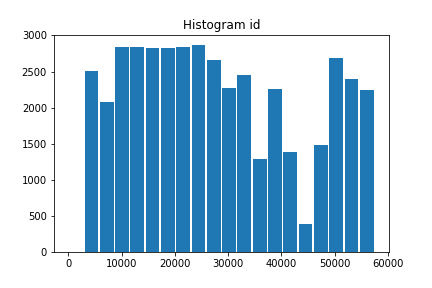
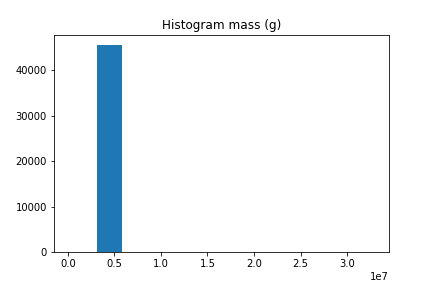
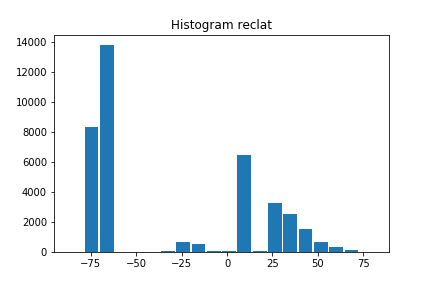
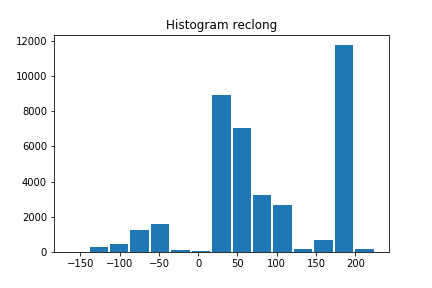

68.4835605567132

In [89]:
start_time = timeit.default_timer()
Profiler.run(df, "*")
timeit.default_timer() - start_time

In [ ]:
v = df.cols.hist("reclat", 0, 100, 10)
pj(v)

In [41]:
obj = {"hist":[{'lower': -87.36666870117188, 'upper': -70.51333465576172, 'value': 0}, {'lower': -70.51333465576172, 'upper': -53.66000061035157, 'value': 22094}, {'lower': -53.66000061035157, 'upper': -36.80666656494141, 'value': 2}, {'lower': -36.80666656494141, 'upper': -19.95333251953125, 'value': 41}, {'lower': -19.95333251953125, 'upper': -3.0999984741210938, 'value': 1170}, {'lower': -3.0999984741210938, 'upper': 13.753335571289064, 'value': 96}, {'lower': 13.753335571289064, 'upper': 30.60666961669922, 'value': 6537}, {'lower': 30.60666961669922, 'upper': 47.46000366210938, 'value': 5791}, {'lower': 47.46000366210938, 'upper': 64.31333770751954, 'value': 2141}, {'lower': 64.31333770751954, 'upper': 81.16667175292969, 'value': 500}]}